In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


                                            filename  width  height   class  \
0  d66fe3c0f7d5a396_jpg.rf.0d947e33ef400474603dc7...    416     416    Crab   
1  b8d029497cf7bac6_jpg.rf.0180374b736435cd50e82b...    416     416  Shrimp   
2  b8d029497cf7bac6_jpg.rf.0180374b736435cd50e82b...    416     416  Shrimp   
3  faa591da3ab1fa90_jpg.rf.0b5cc08196694e1f25b4b0...    416     416  Shrimp   
4  faa591da3ab1fa90_jpg.rf.0b5cc08196694e1f25b4b0...    416     416  Shrimp   

   xmin  ymin  xmax  ymax  
0   148   115   384   302  
1   101     3   164   134  
2   246   112   366   323  
3     0   276   167   415  
4     6    27   138   143  
filename    d66fe3c0f7d5a396_jpg.rf.0d947e33ef400474603dc7...
width                                                     416
height                                                    416
class                                                    Crab
xmin                                                      148
ymin                                           

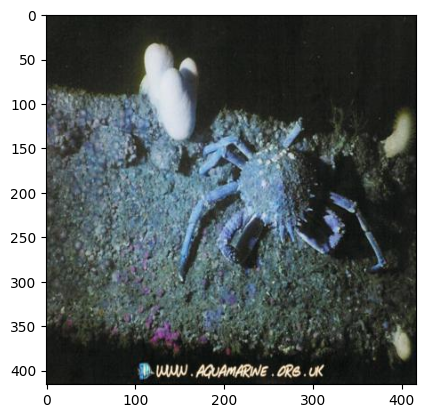

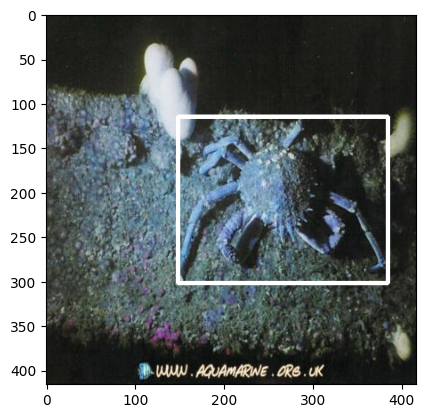

In [2]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout

df = pd.read_csv('/content/drive/MyDrive/nnFinalProjectFiles/shellfish_dataset/train/_annotations.csv')
print(df.head())

print(df.iloc[0]) #print the first row of data
np_array = df.values
print(np_array)
print(len(np_array[0]))

# get a test first image
img_ = cv2.imread('/content/drive/MyDrive/nnFinalProjectFiles/shellfish_dataset/train/d66fe3c0f7d5a396_jpg.rf.0d947e33ef400474603dc78f438e2101.jpg')
plt.imshow(img_)

# draw a bounding box around the animal
# print(df[['xmin', 'xmax', 'ymin', 'ymax']])
# print(df[['xmin', 'xmax', 'ymin', 'ymax']].to_string(index=False))
print(df.loc[0, ['xmin', 'xmax', 'ymin', 'ymax']])
xmin = int(df.loc[0, 'xmin'])
xmax = int(df.loc[0, 'xmax'])
ymin = int(df.loc[0, 'ymin'])
ymax = int(df.loc[0, 'ymax'])
cv2.rectangle(img_,(xmin,ymin),(xmax,ymax),(255,255,255), 3)

# print(df.loc[0, 'filename']) #print the name of the corresponding image
plt.figure()
plt.imshow(img_)

# 11/25 Progress

#Begin Creating Model


In [3]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
import pathlib
import pandas as pd
from PIL import Image
from PIL.ImageDraw import Draw

In [4]:
def load_and_process_data(csv_file, image_dir):
    image_records = pd.read_csv(csv_file)
    image_path = os.path.join(os.getcwd(), image_dir)
    # print(image_path)

    images = []
    targets = []
    labels = []

    for index, row in image_records.iterrows():
        (filename, width, height, class_name, xmin, ymin, xmax, ymax) = row

        image_fullpath = os.path.join(image_path, filename)
        img = keras.preprocessing.image.load_img(image_fullpath)
        img_arr = keras.preprocessing.image.img_to_array(img)
        # print(img_arr.shape)

        xmin = round(xmin/ width, 2)
        ymin = round(ymin/ height, 2)
        xmax = round(xmax/ width, 2)
        ymax = round(ymax/ height, 2)

        images.append(img_arr)
        targets.append((xmin, ymin, xmax, ymax))
        labels.append(classes.index(class_name))

    return images, targets, labels

In [5]:
width = 416
height = 416
num_classes = 3
classes = ["Crab", "Shrimp", "Lobster"]

In [6]:
# load and preprocess datasets
TRAINING_CSV_FILE = '/content/drive/MyDrive/nnFinalProjectFiles/shellfish_dataset/train/_annotations.csv'
VALIDATION_CSV_FILE = '/content/drive/MyDrive/nnFinalProjectFiles/shellfish_dataset/valid/_annotations.csv'
TESTING_CSV_FILE = '/content/drive/MyDrive/nnFinalProjectFiles/shellfish_dataset/test/_annotations.csv'

TRAINING_IMAGE_DIR = '/content/drive/MyDrive/nnFinalProjectFiles/shellfish_dataset/train'
VALIDATION_IMAGE_DIR = '/content/drive/MyDrive/nnFinalProjectFiles/shellfish_dataset/valid'
TESTING_IMAGE_DIR = '/content/drive/MyDrive/nnFinalProjectFiles/shellfish_dataset/test'

train_images, train_targets, train_labels = load_and_process_data(TRAINING_CSV_FILE, TRAINING_IMAGE_DIR)
validation_images, validation_targets, validation_labels = load_and_process_data(VALIDATION_CSV_FILE, VALIDATION_IMAGE_DIR)
test_images, test_targets, test_labels = load_and_process_data(TESTING_CSV_FILE, TESTING_IMAGE_DIR)

In [7]:
# convert data to np.array; also one-hot encode class labels
train_images = np.array(train_images)
train_targets = np.array(train_targets)
train_labels = np.array(train_labels)
train_labels = to_categorical(train_labels)

test_images = np.array(test_images)
test_targets = np.array(test_targets)
test_labels = np.array(test_labels)
test_labels = to_categorical(test_labels)

validation_images = np.array(validation_images)
validation_targets = np.array(validation_targets)
validation_labels = np.array(validation_labels)
validation_labels = to_categorical(validation_labels)
print(validation_labels[0], type(validation_labels))


[0. 0. 1.] <class 'numpy.ndarray'>


In [8]:
# Try building model a different way

# Notes:
# using sparce_cat_cross without one-hot encoding went much faster (with rescalinf of input data (imgs))
# using cat_cross with one-hot encoding was slow

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout

input_shape = (height, width, 3)

model = Sequential()

# Convolutional Phase
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape, name='bl_1')) # this made training go MUCH faster
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

# for classification output
classification_output = Dense(num_classes, activation='softmax', name='classification_output')(model.layers[-1].output)

# for localization output
bounding_box_output = Dense(4, activation='linear', name='bounding_box_output')(model.layers[-1].output)

model = Model(inputs=model.input, outputs=[classification_output, bounding_box_output])

losses = {
    "classification_output": "categorical_crossentropy",
    "bounding_box_output": "mse"
}

model.compile(loss=losses, optimizer='adam', metrics=['accuracy'], run_eagerly=True)

model.summary()

print(train_images.shape)
print(train_labels.shape)
print(train_targets.shape)
print(test_images.shape)
print(test_labels.shape)
print(test_targets.shape)

history = model.fit(
    train_images,
    {"classification_output": train_labels, "bounding_box_output": train_targets},
    validation_data=(test_images, {"classification_output": test_labels, "bounding_box_output": test_targets}),
    epochs=10,
    batch_size=16
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 bl_1_input (InputLayer)     [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 bl_1 (Rescaling)            (None, 416, 416, 3)          0         ['bl_1_input[0][0]']          
                                                                                                  
 conv2d (Conv2D)             (None, 414, 414, 16)         448       ['bl_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 207, 207, 16)         0         ['conv2d[0][0]']              
 D)                                                                                           

54/54 [==============================] - 21s 172ms/step - loss: 64.6149 - classification_output_loss: 1.5535 - bounding_box_output_loss: 63.0614 - classification_output_accuracy: 0.5280 - bounding_box_output_accuracy: 0.2972 - val_loss: 0.9989 - val_classification_output_loss: 0.8978 - val_bounding_box_output_loss: 0.1011 - val_classification_output_accuracy: 0.5345 - val_bounding_box_output_accuracy: 0.4655
Epoch 2/10
54/54 [==============================] - 8s 149ms/step - loss: 0.8108 - classification_output_loss: 0.6994 - bounding_box_output_loss: 0.1115 - classification_output_accuracy: 0.7214 - bounding_box_output_accuracy: 0.4604 - val_loss: 1.0590 - val_classification_output_loss: 0.9203 - val_bounding_box_output_loss: 0.1387 - val_classification_output_accuracy: 0.4828 - val_bounding_box_output_accuracy: 0.4483
Epoch 3/10
54/54 [==============================] - 8s 146ms/step - loss: 0.5747 - classification_output_loss: 0.4486 - bounding_box_output_loss: 0.1261 - classificatio

{'loss': [64.61494445800781, 0.8108422160148621, 0.5746705532073975, 0.49696314334869385, 0.395332008600235, 0.2886003851890564, 0.23227311670780182, 0.21150442957878113, 0.23923137784004211, 0.17590366303920746], 'classification_output_loss': [1.5535346269607544, 0.69936203956604, 0.4486021101474762, 0.275478720664978, 0.20385798811912537, 0.1409291923046112, 0.10032648593187332, 0.08101188391447067, 0.08263906836509705, 0.06309482455253601], 'bounding_box_output_loss': [63.06142044067383, 0.11148033291101456, 0.12606850266456604, 0.22148451209068298, 0.19147391617298126, 0.1476711630821228, 0.1319465935230255, 0.13049250841140747, 0.15659236907958984, 0.11280883848667145], 'classification_output_accuracy': [0.5279720425605774, 0.7214452028274536, 0.8578088283538818, 0.9265734553337097, 0.9487179517745972, 0.9696969985961914, 0.9871794581413269, 0.9930070042610168, 0.9918414950370789, 0.9918414950370789], 'bounding_box_output_accuracy': [0.29720279574394226, 0.4603729546070099, 0.5128

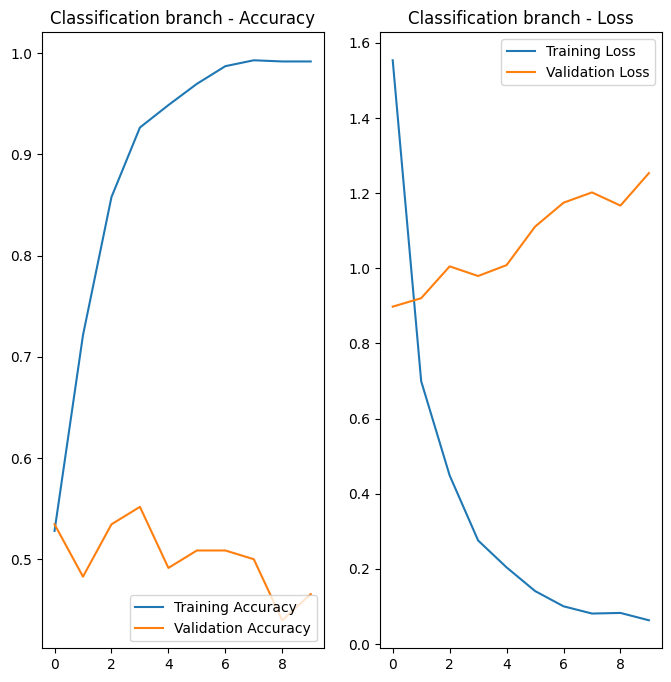

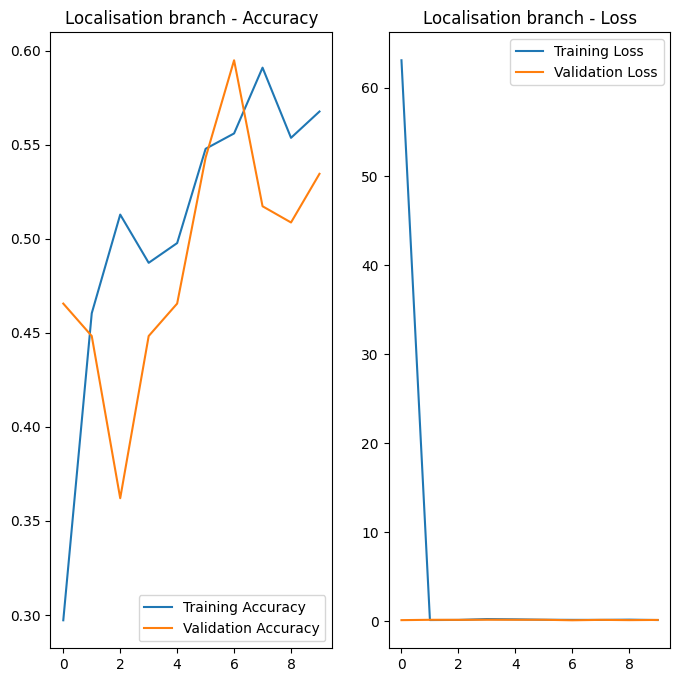

{'loss': [64.61494445800781, 0.8108422160148621, 0.5746705532073975, 0.49696314334869385, 0.395332008600235, 0.2886003851890564, 0.23227311670780182, 0.21150442957878113, 0.23923137784004211, 0.17590366303920746], 'classification_output_loss': [1.5535346269607544, 0.69936203956604, 0.4486021101474762, 0.275478720664978, 0.20385798811912537, 0.1409291923046112, 0.10032648593187332, 0.08101188391447067, 0.08263906836509705, 0.06309482455253601], 'bounding_box_output_loss': [63.06142044067383, 0.11148033291101456, 0.12606850266456604, 0.22148451209068298, 0.19147391617298126, 0.1476711630821228, 0.1319465935230255, 0.13049250841140747, 0.15659236907958984, 0.11280883848667145], 'classification_output_accuracy': [0.5279720425605774, 0.7214452028274536, 0.8578088283538818, 0.9265734553337097, 0.9487179517745972, 0.9696969985961914, 0.9871794581413269, 0.9930070042610168, 0.9918414950370789, 0.9918414950370789], 'bounding_box_output_accuracy': [0.29720279574394226, 0.4603729546070099, 0.5128

In [9]:
print(history.history)
cl_accuracy = history.history['classification_output_accuracy']
cl_val_acc = history.history['val_classification_output_accuracy']

bb_accuracy = history.history['bounding_box_output_accuracy']
bb_val_acc = history.history['val_bounding_box_output_accuracy']

cl_loss = history.history['classification_output_loss']
cl_val_loss = history.history['val_classification_output_loss']

bb_loss = history.history['bounding_box_output_loss']
bb_val_loss = history.history['val_bounding_box_output_loss']



epochs_range = range(10)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cl_accuracy, label='Training Accuracy')
plt.plot(epochs_range, cl_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Classification branch - Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, cl_loss, label='Training Loss')
plt.plot(epochs_range, cl_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Classification branch - Loss')
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, bb_accuracy, label='Training Accuracy')
plt.plot(epochs_range, bb_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Localisation branch - Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, bb_loss, label='Training Loss')
plt.plot(epochs_range, bb_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Localisation branch - Loss')
plt.show()

print(history.history)

1/1 [==============================] - 0s 93ms/step
[array([[0.00754139, 0.3607789 , 0.6316797 ]], dtype=float32), array([[-0.20620577,  0.37759042,  0.49965146,  0.39578193]],
      dtype=float32)]
['Crab', 'Shrimp', 'Lobster']
2
Lobster
1/1 [==============================] - 0s 122ms/step
[array([[0.25272796, 0.68338764, 0.0638844 ]], dtype=float32), array([[0.05390795, 0.19435816, 0.27801278, 0.43166625]], dtype=float32)]
['Crab', 'Shrimp', 'Lobster']
1
Shrimp
1/1 [==============================] - 0s 33ms/step
[array([[0.40692276, 0.09517856, 0.49789876]], dtype=float32), array([[-0.08553354, -0.0007502 ,  0.33376792,  0.29182768]],
      dtype=float32)]
['Crab', 'Shrimp', 'Lobster']
2
Lobster
1/1 [==============================] - 0s 46ms/step
[array([[0.7068196 , 0.12703565, 0.16614479]], dtype=float32), array([[-0.02430861,  0.12209354,  0.5108223 ,  0.3151908 ]],
      dtype=float32)]
['Crab', 'Shrimp', 'Lobster']
0
Crab
1/1 [==============================] - 0s 35ms/step
[arra

<Figure size 2000x2000 with 0 Axes>

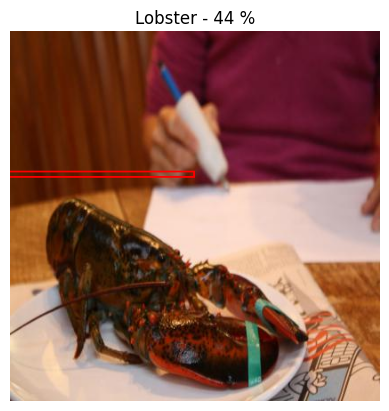

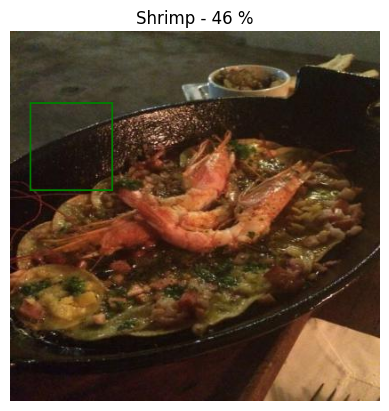

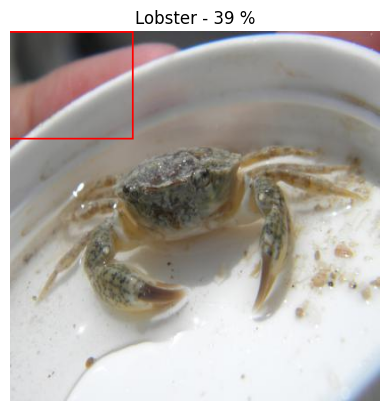

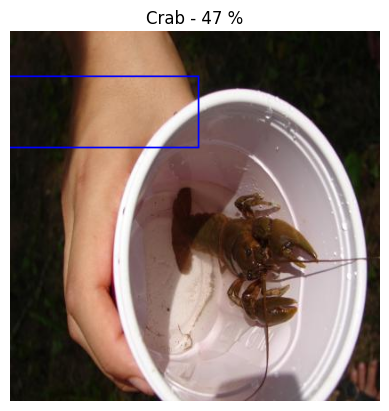

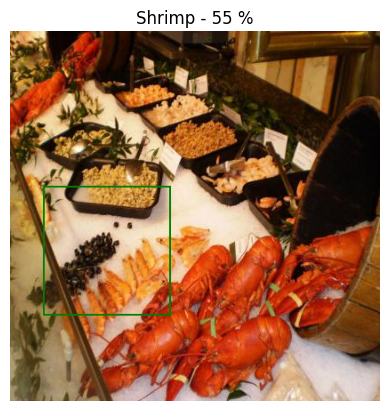

In [11]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

test_dir = pathlib.Path('/content/drive/MyDrive/nnFinalProjectFiles/shellfish_dataset/test')
img_paths = list(test_dir.glob('*.jpg'))

plt.figure(figsize=(20, 20))

for i, img_path in enumerate(img_paths[:5]):
    shellfish_img = keras.preprocessing.image.load_img(img_path, target_size=(height, width))
    img_arr = keras.preprocessing.image.img_to_array(shellfish_img)
    img_arr = tf.expand_dims(img_arr, 0)

    predictions = model.predict(img_arr)
    print(predictions)

    # for classification
    score = tf.nn.softmax(predictions[0][0])
    percent = int(round(100*np.max(score), 0))
    print(classes)
    print(np.argmax(score))
    print(classes[np.argmax(score)])
    class_name = classes[np.argmax(score)]
    title = "{} - {} %".format(class_name, percent)

    # for localization
    bbox = predictions[1][0]
    bbox = [min(bbox[0], bbox[2]) * width, min(bbox[1], bbox[3]) * height, max(bbox[0], bbox[2]) * width, max(bbox[1], bbox[3]) * height]

    if class_name == 'Shrimp':
      shellfish_img_arr = np.array(shellfish_img)
      cv2.rectangle(shellfish_img_arr, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (255, 255, 255), 3)
      shellfish_img_arr_rgb = cv2.cvtColor(shellfish_img_arr, cv2.COLOR_BGR2RGB)
      plt.figure()
      plt.imshow(shellfish_img_arr_rgb)
      draw1 = Draw(shellfish_img)
      draw1.rectangle(bbox, outline='green', width=2)

    if class_name == 'Lobster':
        shellfish_img_arr = np.array(shellfish_img)
        cv2.rectangle(shellfish_img_arr, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (255, 255, 255), 3)
        shellfish_img_arr_rgb = cv2.cvtColor(shellfish_img_arr, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.imshow(shellfish_img_arr_rgb)
        draw1 = Draw(shellfish_img)
        draw1.rectangle(bbox, outline='red', width=2)

    if class_name == 'Crab':
        shellfish_img_arr = np.array(shellfish_img)
        cv2.rectangle(shellfish_img_arr, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (255, 255, 255), 3)
        shellfish_img_arr_rgb = cv2.cvtColor(shellfish_img_arr, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.imshow(shellfish_img_arr_rgb)
        draw1 = Draw(shellfish_img)
        draw1.rectangle(bbox, outline='blue', width=2)

    # ax = plt.subplot(29, 2, i+1)
    plt.imshow(shellfish_img)
    plt.title(title)
    plt.axis("off")